# Evaluate Grid Search
In this notebook, I want to analyse the results from a conducted grid search over GCN hyper-parameters.
This should show me which ones perform best.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Box Plot of Best Cross-Validation Runs
At first, I want to investigate the best grid search runs. The problem is here that I only reported accuracy and loss but not the famous and very much desired AUPR value.
I now report that as well but until the second grid search has finished, I have to try to normalize for the number of predictions, too.

In [137]:
# open grid search results
with open('../data/gridsearch/gridsearch_results.pkl', 'rb') as f:
    performances = pickle.load(f)

### Balanced Training Set
This means that I used a subsampled set of negatives for training.

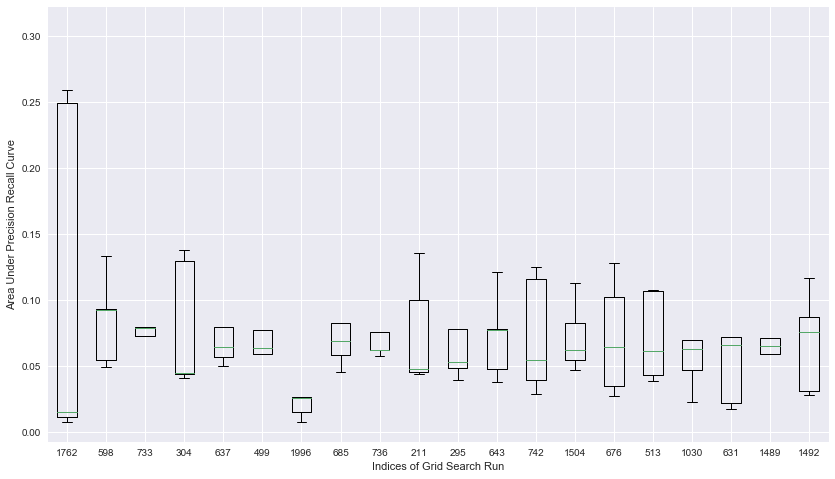

In [138]:
num_to_print = 20
aupr_sorted = sorted(performances, key=lambda x: np.mean(x[3]),
                     reverse=True)
aupr_only = [p[3] for p in aupr_sorted]
indices = np.argsort([np.mean(p[3]) for p in performances])[::-1]

fig, ax = plt.subplots(figsize=(14, 8))
#fig = plt.figure(figsize=(14,  8))
x = plt.boxplot(aupr_only[:num_to_print], labels=indices[:num_to_print])
ax.set_ylabel('Area Under Precision Recall Curve')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_aupr.png'.format(num_to_print), dpi=300)

In [13]:
performances[733]

([0.78878874, 0.83783776, 0.8068068, 0.75575572, 0.77577579],
 [0.69469631, 0.52123713, 0.68269271, 0.83822036, 0.7593627],
 [239, 194, 223, 272, 252],
 [0.072982457488860758,
  0.079888256975619701,
  0.13377086487771592,
  0.05737994391454556,
  0.078852906149551469],
 {'dropout': 0.1,
  'epochs': 100,
  'hidden1': 50,
  'hidden2': 50,
  'learningrate': 0.01,
  'loss_mul': 1,
  'support': 2,
  'weight_decay': 0.0005})

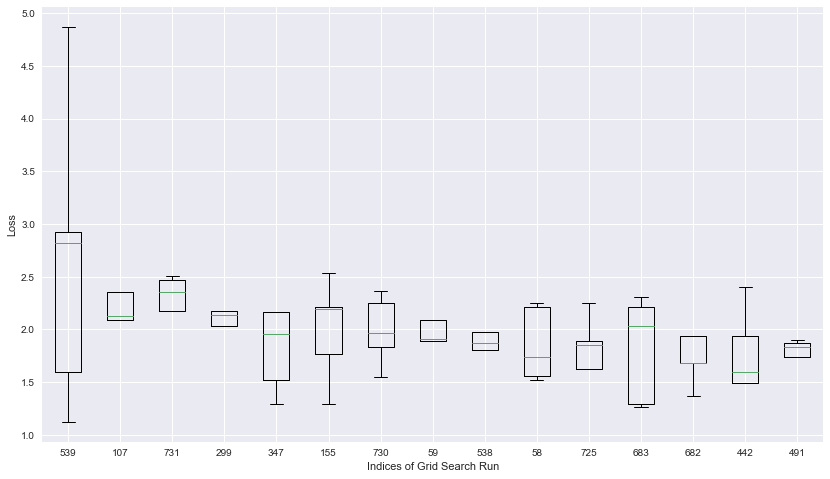

In [53]:
num_to_print = 15
all_losses = [p[1] for p in performances]
sorted_loss = sorted(all_losses, key=lambda x: np.mean(x), reverse=True)
indices = np.argsort(np.mean(all_losses, axis=1))[::-1]

fig, ax = plt.subplots(figsize=(14, 8))
x = plt.boxplot(sorted_loss[:num_to_print], labels=indices[:num_to_print])
ax.set_ylabel('Loss')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_loss.png'.format(num_to_print), dpi=300)

### Unbalanced Training Set
This means that I simply used a certain percentage of examples from both classes for training.

In [141]:
with open('../data/gridsearch/gridsearch_results_unbalanced.pkl', 'rb') as f:
    performances = pickle.load(f)
    print (len(performances))

2880


122 2880


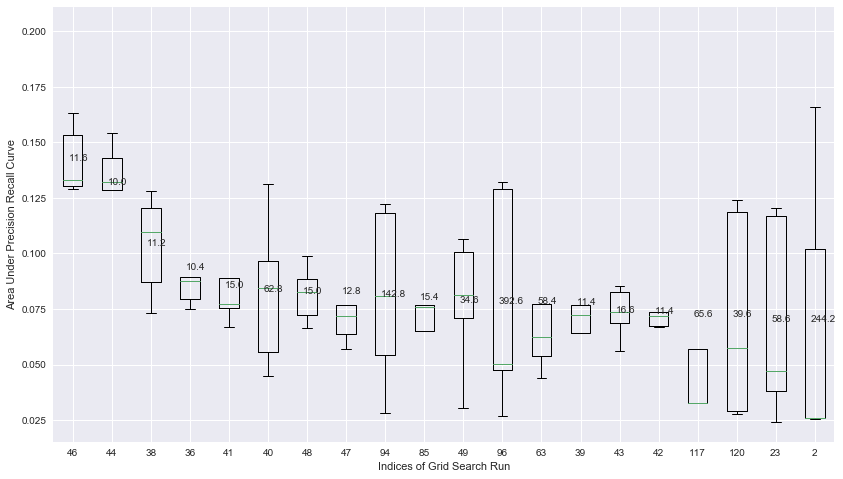

In [144]:
def boxplot_performances(perf, num_to_plot, sort_func, reverse=True, index_to_show=2):
    perf_sorted = sorted(perf, key=sort_func, reverse=reverse)
    indices = np.argsort([sort_func(p) for p in perf])
    if reverse:
        indices = indices[::-1]
    to_show = [p[index_to_show] for p in perf_sorted]
    
    # plot boxplot
    fig, ax = plt.subplots(figsize=(14, 8))
    x = plt.boxplot(to_show[:num_to_print], labels=indices[:num_to_print])
    # plot upper labels
    x_pos = np.arange(num_to_plot) + 1
    y_pos = [np.mean(x[index_to_show]) for x in perf_sorted]
    labels = [str(np.mean(x[2])) for x in perf_sorted]
    
    for tick, label in zip(range(num_to_plot), ax.get_xticklabels()):
        ax.text(x_pos[tick]-.1, y_pos[tick], labels[tick])

    ax.set_ylabel('Area Under Precision Recall Curve')
    ax.set_xlabel('Indices of Grid Search Run')
    #fig.savefig('boxplot_best_{}_aupr.png'.format(num_to_print), dpi=300)
pp38 = [p for p in performances if np.mean(p[2]) >= 10]
print (len(pp38), len(performances))
boxplot_performances(pp38,
                     max(20, len(pp38)),
                     lambda x: np.mean(np.array(x[3])),
                     reverse=True,
                     index_to_show=3) # 2=number of predictions

In [145]:
pp38[46]

([0.9620254, 0.95569628, 0.96518999, 0.9620254, 0.9620254],
 [3.6317065, 3.6371372, 3.626997, 3.6312373, 3.6314981],
 [12, 15, 8, 14, 9],
 [0.13305509696959078,
  0.13057206319499895,
  0.16328103370758365,
  0.15316174575496386,
  0.12922175752708837],
 {'dropout': 0.1,
  'epochs': 100,
  'hidden1': 50,
  'hidden2': 50,
  'learningrate': 0.01,
  'loss_mul': 100,
  'support': 2,
  'weight_decay': 0.0005})

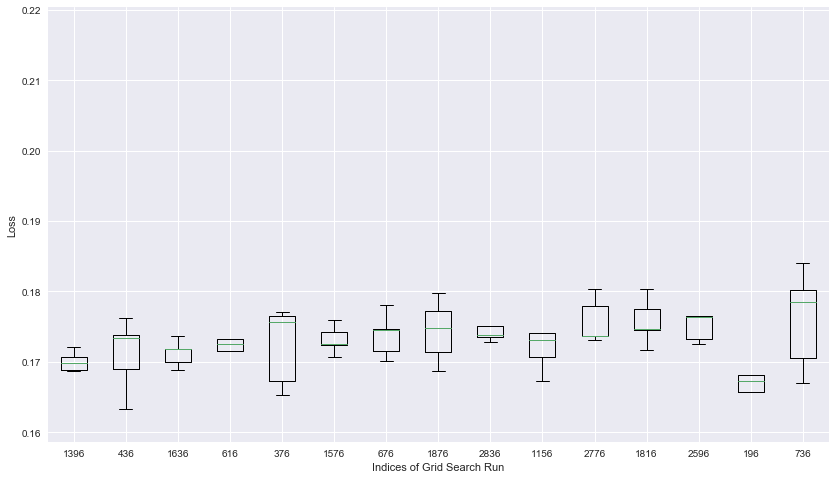

In [23]:
num_to_print = 15
all_losses = [p[1] for p in performances]
sorted_loss = sorted(all_losses, key=lambda x: np.mean(x), reverse=False)
indices = np.argsort(np.mean(all_losses, axis=1))

fig, ax = plt.subplots(figsize=(14, 8))
x = plt.boxplot(sorted_loss[:num_to_print], labels=indices[:num_to_print])
ax.set_ylabel('Loss')
ax.set_xlabel('Indices of Grid Search Run')
fig.savefig('boxplot_best_{}_loss.png'.format(num_to_print), dpi=300)

In [24]:
performances[1396]

([0.96518999, 0.96518999, 0.96518999, 0.96518999, 0.96518999],
 [0.16981646, 0.16879088, 0.17212394, 0.17064872, 0.16868113],
 [0, 0, 0, 0, 0],
 [0.13429407072171479,
  0.14493841708017252,
  0.12103781582193342,
  0.12104513246379112,
  0.11536665608835356],
 {'dropout': 0.25,
  'epochs': 100,
  'hidden1': 10,
  'hidden2': 50,
  'learningrate': 0.01,
  'loss_mul': 1,
  'support': 2,
  'weight_decay': 0.0005})